<a href="https://colab.research.google.com/github/meghananv3/meghananv3/blob/main/App_Cab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Package**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Importing data from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


List the content of drive

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


Read the data from CSV file and storing to the variable 'cab_data'

In [ ]:
cab_data = pd.read_csv(r'/content/drive/MyDrive/IIM Study Material/IIM/app cab data.csv')

In [ ]:
cab_data.head()

print(cab_data.head())

   Request id Pickup point  Driver id          Status Request timestamp  \
0         619      Airport        1.0  Trip Completed  11-07-2016 11:51   
1         867      Airport        1.0  Trip Completed  11-07-2016 17:57   
2        1807         City        1.0  Trip Completed  12-07-2016 09:17   
3        2532      Airport        1.0  Trip Completed  12-07-2016 21:08   
4        3112         City        1.0  Trip Completed  13-07-2016 08:33   

     Drop timestamp  
0  11-07-2016 13:00  
1  11-07-2016 18:47  
2  12-07-2016 09:58  
3  12-07-2016 22:03  
4  13-07-2016 09:25  


In [ ]:
cab_data['Request timestamp'] = pd.to_datetime(cab_data['Request timestamp'], dayfirst=True, errors='coerce')

In [ ]:
cab_data['Drop timestamp'] = pd.to_datetime(cab_data['Drop timestamp'], dayfirst=True, errors='coerce')

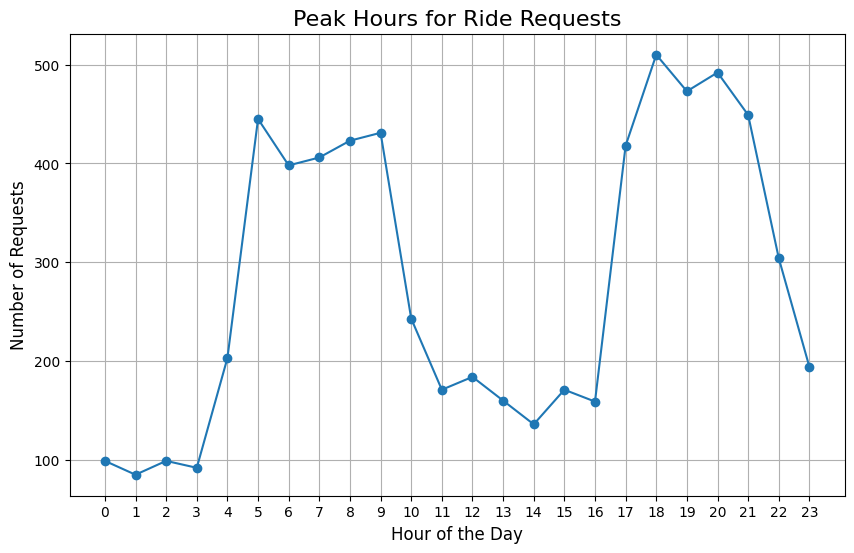

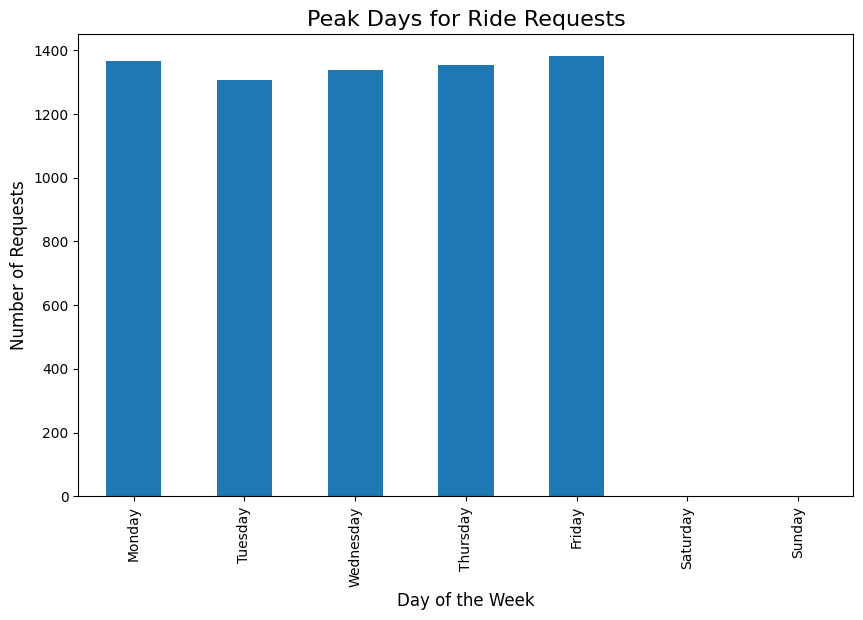

In [ ]:
cab_data['Hour'] = cab_data['Request timestamp'].dt.hour
cab_data['Day'] = cab_data['Request timestamp'].dt.day_name()

# Group by Hour to find peak hours
hourly_requests = cab_data['Hour'].value_counts().sort_index()

# Plot hourly ride requests
plt.figure(figsize=(10, 6))
plt.plot(hourly_requests.index, hourly_requests.values, marker='o')
plt.title('Peak Hours for Ride Requests', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Requests', fontsize=12)
plt.xticks(range(0, 24))
plt.grid()
plt.show()

# Group by Day to find peak days
daily_requests = cab_data['Day'].value_counts()

# Plot daily ride requests
plt.figure(figsize=(10, 6))
daily_requests.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar')
plt.title('Peak Days for Ride Requests', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Requests', fontsize=12)
plt.show()